In [2]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.__version__

'2.10.0+cu126'

In [4]:
torch.tensor(5)

tensor(5)

In [5]:
data = [1, 2, 3]

torch.tensor(data)

tensor([1, 2, 3])

In [6]:
import numpy as np

np_data = np.array([[1, 2], [3, 4]])

torch.tensor(np_data)

tensor([[1, 2],
        [3, 4]])

In [7]:
torch.from_numpy(np_data)

tensor([[1, 2],
        [3, 4]])

In [ ]:
torch.arange(0, 10, 2)  # 일정 간격 데이터 생성

tensor([0, 2, 4, 6, 8])

In [10]:
torch.linspace(0, 10, 5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [12]:
torch.randint(0, 10, (2, 3))

tensor([[3, 1, 2],
        [9, 6, 6]])

In [17]:
torch.rand((2, 3))

tensor([[0.8636, 0.7013, 0.8061],
        [0.7683, 0.2398, 0.9977]])

In [19]:
torch.rand((128, 128, 3))
torch.rand((3, 128, 128))

tensor([[[0.5331, 0.8478, 0.3926,  ..., 0.2255, 0.7262, 0.5156],
         [0.7662, 0.7664, 0.1470,  ..., 0.3423, 0.3800, 0.0483],
         [0.2356, 0.5043, 0.6321,  ..., 0.5268, 0.8618, 0.3432],
         ...,
         [0.1907, 0.6439, 0.0449,  ..., 0.1163, 0.9177, 0.2534],
         [0.9731, 0.1124, 0.5303,  ..., 0.8615, 0.6945, 0.2741],
         [0.2611, 0.8358, 0.6438,  ..., 0.3698, 0.5929, 0.7806]],

        [[0.7164, 0.3110, 0.6587,  ..., 0.1636, 0.5018, 0.9579],
         [0.6057, 0.1727, 0.1382,  ..., 0.3958, 0.5744, 0.7507],
         [0.2450, 0.7815, 0.7928,  ..., 0.6993, 0.8719, 0.9451],
         ...,
         [0.8903, 0.9041, 0.6519,  ..., 0.9896, 0.6246, 0.9404],
         [0.3005, 0.9358, 0.5158,  ..., 0.9285, 0.0520, 0.5626],
         [0.3982, 0.4564, 0.5360,  ..., 0.6867, 0.1328, 0.6070]],

        [[0.1935, 0.0507, 0.2385,  ..., 0.6735, 0.9602, 0.0718],
         [0.6510, 0.7213, 0.4578,  ..., 0.0701, 0.5144, 0.5767],
         [0.8978, 0.4402, 0.6397,  ..., 0.4563, 0.0689, 0.

In [20]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [21]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [22]:
torch.full((2, 3), 255)

tensor([[255, 255, 255],
        [255, 255, 255]])

In [23]:
torch.eye(5, 4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])

**⭐shape 꼭 확인⭐**

In [ ]:
# tensor의 속성

t_data = torch.randint(0, 255, (128, 128))

torch.Size([128, 128])

In [26]:
t_data.shape

torch.Size([128, 128])

In [27]:
# 행렬이 떠올라야 함

t_data.dtype

torch.int64

In [ ]:
# 지금 만든 데이터가 어디에 있는가?
# 데이터가 같은 메모리에 있어야 함

t_data.device

device(type='cpu')

In [ ]:
t_data.T  # 전치 행렬

tensor([[137,  66, 203,  ..., 220, 244, 203],
        [159, 202,  64,  ..., 136,  86,  28],
        [231, 137, 230,  ..., 247,  35, 102],
        ...,
        [117, 155, 132,  ...,  84, 197,  33],
        [215,  83, 253,  ..., 161, 157, 133],
        [238,  87, 232,  ..., 250,  13,  16]])

In [30]:
t_data.to('cuda')

tensor([[137, 159, 231,  ..., 117, 215, 238],
        [ 66, 202, 137,  ..., 155,  83,  87],
        [203,  64, 230,  ..., 132, 253, 232],
        ...,
        [220, 136, 247,  ...,  84, 161, 250],
        [244,  86,  35,  ..., 197, 157,  13],
        [203,  28, 102,  ...,  33, 133,  16]], device='cuda:0')

In [32]:
t_data = torch.zeros(2, 3)
t_data

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [33]:
t_data + 10

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [2]:
t_data = torch.zeros(2, 3)
t_data_1 = torch.ones(2, 3)

In [ ]:
print(t_data)
print(t_data_1)

In [3]:
t_data + t_data_1

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [4]:
t_data - t_data_1

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [5]:
t_data * t_data_1

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
mat_1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
mat_2 = torch.tensor([[1, 2], [3, 4], [5, 6]])

torch.matmul(mat_1, mat_2)

tensor([[22, 28],
        [49, 64]])

In [18]:
data = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(data.shape)
data.dim()

torch.Size([3, 3])


2

In [ ]:
data[0]  # 0번째 행

tensor([1, 2, 3])

In [20]:
data[1]

tensor([4, 5, 6])

In [ ]:
data[:, 0]

tensor([1, 4, 7])

In [22]:
data[:, -1]

tensor([3, 6, 9])

In [23]:
data[:, :2]

tensor([[1, 2],
        [4, 5],
        [7, 8]])

In [33]:
data = torch.zeros(128, 128)
data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [35]:
data_1 = data[12:77, 12:77]
data_1.shape

torch.Size([65, 65])

In [37]:
data = torch.tensor([[1, 2], [3, 4]])

torch.sum(data).item()

10

In [41]:
print(data.dtype)
data = data.to(torch.float16)
torch.mean(data)

torch.int64


tensor(2.5000, dtype=torch.float16)

In [42]:
torch.var(data)

tensor(1.6670, dtype=torch.float16)

In [43]:
torch.std(data)

tensor(1.2910, dtype=torch.float16)

In [44]:
data = torch.randint(0, 255, (128, 128))
data

tensor([[ 95, 248, 217,  ..., 125, 139, 146],
        [219, 229,  88,  ..., 185,  47,  67],
        [175,  23,  62,  ..., 141, 181, 232],
        ...,
        [ 14,  23,  63,  ...,  40,  72,  92],
        [ 61,  80, 218,  ...,  91,  20,  34],
        [173, 138, 201,  ...,  17,  25,   6]])

In [45]:
data.numpy()

array([[ 95, 248, 217, ..., 125, 139, 146],
       [219, 229,  88, ..., 185,  47,  67],
       [175,  23,  62, ..., 141, 181, 232],
       ...,
       [ 14,  23,  63, ...,  40,  72,  92],
       [ 61,  80, 218, ...,  91,  20,  34],
       [173, 138, 201, ...,  17,  25,   6]], shape=(128, 128))

In [47]:
data = torch.tensor([1, 2, 3])
data.shape

torch.Size([3])

In [53]:
data_mat = data.unsqueeze(0)
data_mat

tensor([[1, 2, 3]])

In [54]:
data = torch.tensor([[1, 2, 3]])
data.shape

torch.Size([1, 3])

In [60]:
data_vec = data.squeeze(0)
data_vec

tensor([1, 2, 3])

In [62]:
data = torch.tensor([[1, 2], [3, 4]])

data.view(-1)

tensor([1, 2, 3, 4])

In [ ]:
torch.cuda.is_available()  # cuda 사용 유무
torch.cuda.device_count()  # 디바이스 수
torch.cuda.current_device()  # 현재 사용하고 있는 디바이스

0

In [3]:
data = torch.tensor([1, 2, 3])
data

tensor([1, 2, 3])

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

data = data.to(device)
data

tensor([1, 2, 3], device='cuda:0')

In [ ]:
data_1 = torch.tensor([10, 20, 30])

data + data_1  # 같은 디바이스에 있어야 함

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
data = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
data

tensor([1., 2., 3.], requires_grad=True)

In [8]:
a = data + 1
a

tensor([2., 3., 4.], grad_fn=<AddBackward0>)

In [ ]:
b = a * 2
b

tensor([4., 6., 8.], grad_fn=<MulBackward0>)

In [ ]:
c = b**2
print(a.retain_grad())
print(b.retain_grad())
print(c)
print(c.sum())

None
None
tensor([16., 36., 64.], grad_fn=<PowBackward0>)
tensor(116., grad_fn=<SumBackward0>)


In [ ]:
import torch.nn as nn

# nn.Linear : class로 만들어 사용


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=4, bias=True)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(in_features=4, out_features=3, bias=True)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(in_features=3, out_features=1)

    def forward(self, x):  # 순정파 x: 입력값
        out = self.fc1(x)
        out = self.fc1_act(out)
        out = self.fc2(out)
        out = self.fc2_act(out)
        out = self.fc3(out)
        return out


model_1 = Net()
model_1

Net(
  (fc1): Linear(in_features=3, out_features=4, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
list(model_1.parameters())

6

In [3]:
X = torch.randn(100, 1)
X = X * 10
X.shape

torch.Size([100, 1])

In [4]:
y = X + torch.randn(100, 1)
y.shape

torch.Size([100, 1])

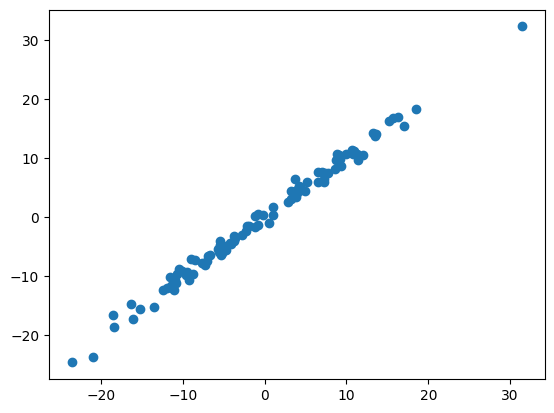

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [8]:
import torch.nn as nn


class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 4)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(4, 3)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc1_act(out)
        out = self.fc2(out)
        out = self.fc2_act(out)
        out = self.fc3(out)

        return out


model = LRModel()
model

LRModel(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9502],
         [0.5639],
         [0.1891],
         [0.0347]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4729,  0.3401, -0.2439,  0.5960], requires_grad=True),
 Parameter containing:
 tensor([[-0.0308,  0.0883, -0.3168,  0.0424],
         [-0.3324, -0.1932,  0.1399, -0.0944],
         [-0.4269,  0.3762, -0.2989, -0.2288]], requires_grad=True),
 Parameter containing:
 tensor([-0.3041,  0.2781,  0.1383], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0109, -0.1448,  0.1267]], requires_grad=True),
 Parameter containing:
 tensor([0.1714], requires_grad=True)]

In [18]:
import torch.optim as optim

criterion = nn.MSELoss()  # 회귀 평균 ** 2 오차
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 1e-3 # 0.001 ~ 0.003
epochs = 10000

loss_list = []

for _ in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    pred = model(X)
    loss = criterion(pred, y)
    loss_list.append(loss.item())
    print('손실값 : ', loss)
    # 역전파
    loss.backward()
    optimizer.step()


손실값 :  tensor(41.7638, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7568, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7497, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7426, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7356, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7286, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7216, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7145, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7075, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.7005, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6935, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6865, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6794, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6724, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6654, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6584, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6514, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6444, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6373, grad_fn=<MseLossBackward0>)
손실값 :  tensor(41.6303, grad_fn=

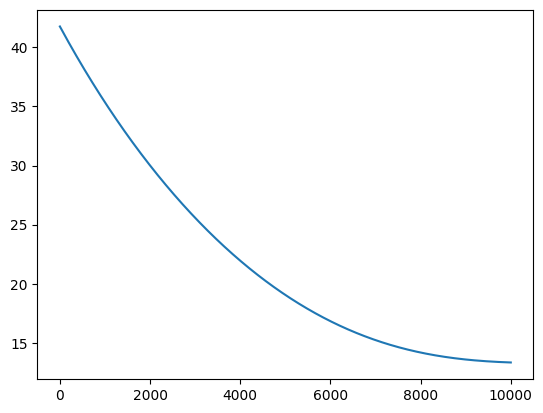

In [19]:
plt.plot(range(epochs), loss_list)
plt.show()